# 实现一个神经网络
在这个练习中，我们将开发一个具有全连接层的神经网络来执行分类，并在CIFAR-10数据集上进行测试。

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

我们将在文件`s231n/classifiers/neural_net`中使用类`TwoLayerNet`。表示我们的网络实例。网络参数存储在实例变量`self`中。其中键是字符串参数名，值是numpy数组。

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# 向前传播:计算分数
打开文件`cs231n/classifiers/neural_net`看看`TwoLayerNet.loss`方法。这个函数与您为SVM和Softmax练习编写的损失函数非常相似:它获取数据和权重，并计算类分数、损失和参数上的梯度。实现前向传播的第一部分，它使用权重和偏差来计算所有输入的分数。

In [3]:
scores = net.loss(X)
print ('Your scores:')
print (scores)
print
print ('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print (correct_scores)
print

# The difference should be very small. We get < 1e-7
print ('Difference between your scores and correct scores:')
print (np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
Difference between your scores and correct scores:
3.6802720745909845e-08


# 前向传播:计算损失
在同一个函数中，实现数据计算的第二部分和正则化损耗。

In [4]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print ('Difference between your loss and correct loss:')
print (np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# 后向传播
实现函数的其余部分。这将计算关于变量“W1”、“b1”、“W2”和“b2”的损失梯度。现在你(希望!)有一个正确实现的前向传播，你可以调试你的后向传播使用一个数字梯度检查:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print ('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447646e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# 训练网络
为了训练网络，我们将使用随机梯度下降法(SGD)，类似于SVM和Softmax分类器。看看`TwoLayerNet.train`函数。训练并填写缺失的部分，以执行训练程序。这应该与SVM和Softmax分类器的训练过程非常相似。您还必须实现`TwoLayerNet.predict`，即在网络训练过程中，训练过程会周期性地进行预测，以跟踪一段时间内的准确性。
一旦你实现了这个方法，运行下面的代码在玩具数据上训练一个两层网络。你的训练损失应该小于0.2。

Final training loss:  0.01714960793873204


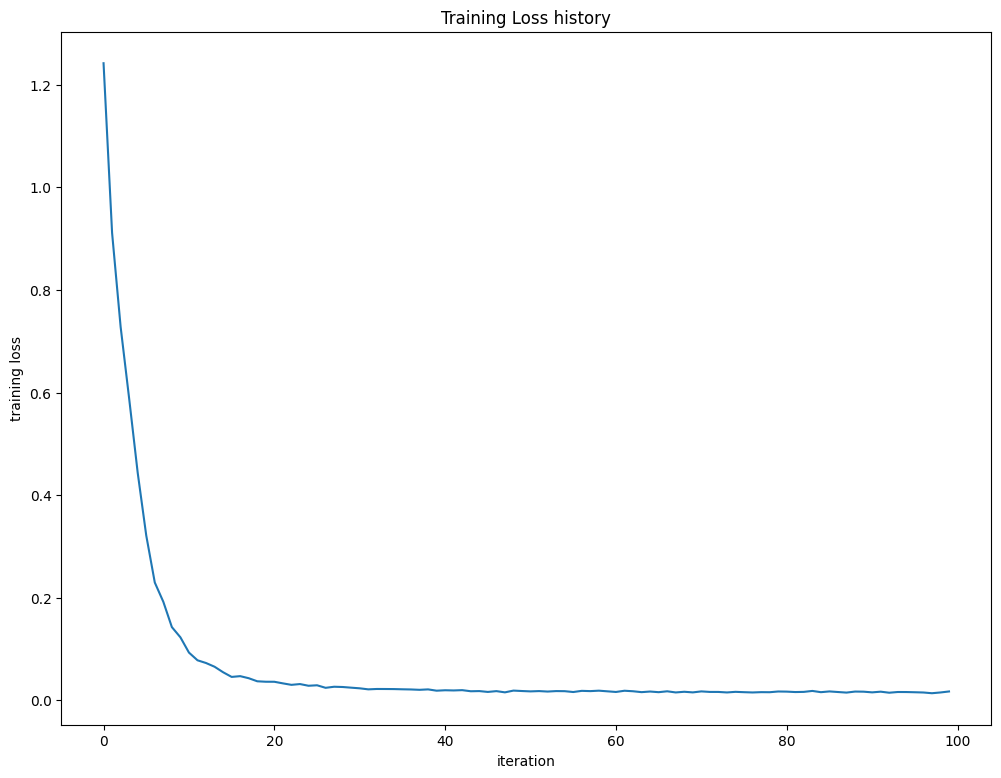

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print ('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# 加载数据
现在您已经实现了一个两层的网络，它可以通过渐变检查并处理玩具数据，现在是时候加载我们最喜欢的CIFAR-10数据了，这样我们就可以使用它来训练真实数据集上的分类器。

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# 训练网络
训练我们的网络，我们将使用带动量的SGD。此外，随着优化的进行，我们将采用指数学习速率计划来调整学习速率;在每个epoch之后，我们将通过将其乘以衰减率来降低学习率。

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print ('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 1.964946
iteration 200 / 1000: loss 1.750511
iteration 300 / 1000: loss 1.613416
iteration 400 / 1000: loss 1.714102
iteration 500 / 1000: loss 1.546602
iteration 600 / 1000: loss 1.644443
iteration 700 / 1000: loss 1.448247
iteration 800 / 1000: loss 1.456147
iteration 900 / 1000: loss 1.506688
Validation accuracy:  0.465


# 调试训练
使用上面提供的默认参数，验证集的验证精度应该在0.29左右。这不是很好。
了解问题所在的一种策略是，在优化期间绘制损失函数和训练集和验证集的准确性。
另一种策略是将在网络的第一层学到的权重可视化。在大多数以视觉数据为训练对象的神经网络中，第一层的权值在可视化时通常会显示一些可见的结构。

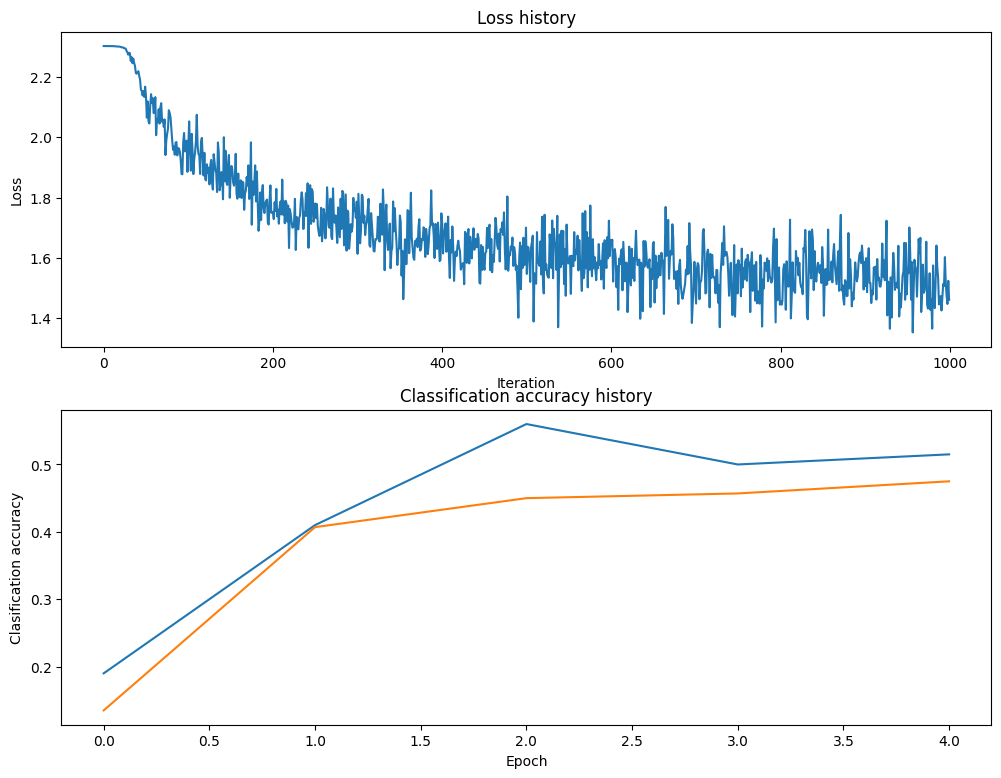

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

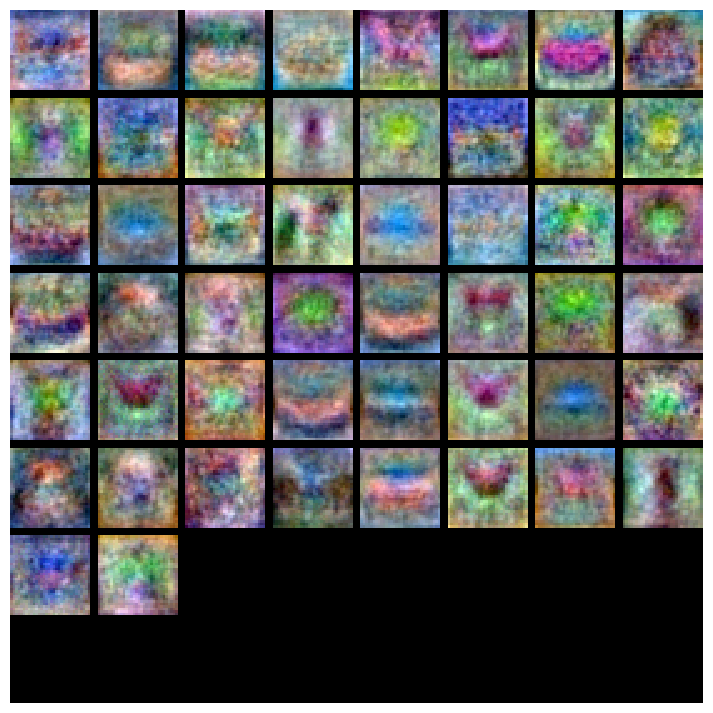

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

# 调整你的超参数
**怎么了?** 看看上面的可视化，我们可以看到损失或多或少呈线性下降，这似乎表明学习率可能太低了。此外，训练的准确性和验证的准确性之间没有差距，这说明我们使用的模型容量较低，我们应该增加模型的大小。另一方面，对于一个非常大的模型，我们期望看到更多的过拟合，这将表现为训练和验证准确性之间的一个非常大的差距。

**调优** 调整超参数并开发它们如何影响最终性能的直觉是使用神经网络的一个重要部分，因此我们希望您进行大量实践。下面，您应该试验各种超参数的不同值，包括隐层大小、学习率、训练周期数和正则化强度。您也可以考虑调优学习速率衰减，但是您应该能够使用默认值获得良好的性能。

**近似的结果** 您的目标应该是在验证集上获得超过48%的分类准确率。我们最好的网络在验证集上获得超过52%的准确率。

**实验** 你的目标是在CIFAR-10上获得尽可能好的结果，使用一个全连接的神经网络。对于每一个超过52%的测试集，我们将奖励你一个额外的积分。您可以自由地实现自己的技术(例如，使用PCA来降低维度，或添加dropout，或向求解器添加特性，等等)。

In [11]:
best_net = None # store the best model into this 
#learning_rates = [1e-3, 1.2e-3, 1.4e-3, 1.6e-3, 1.8e-3]
#regularization_strengths = [1e-4, 1e-3, 1e-2]
learning_rates = [1.6e-3]
regularization_strengths = [1e-2]
hidden_size = 400
results = {}
best_val = -1
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
pass
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 2000: loss 2.302612
iteration 100 / 2000: loss 1.821605
iteration 200 / 2000: loss 1.656478
iteration 300 / 2000: loss 1.485311
iteration 400 / 2000: loss 1.555701
iteration 500 / 2000: loss 1.449879
iteration 600 / 2000: loss 1.342133
iteration 700 / 2000: loss 1.352047
iteration 800 / 2000: loss 1.202053
iteration 900 / 2000: loss 1.305937
iteration 1000 / 2000: loss 1.262494
iteration 1100 / 2000: loss 1.166489
iteration 1200 / 2000: loss 1.205826
iteration 1300 / 2000: loss 1.195101
iteration 1400 / 2000: loss 1.011163
iteration 1500 / 2000: loss 1.113309
iteration 1600 / 2000: loss 1.168930
iteration 1700 / 2000: loss 1.117758
iteration 1800 / 2000: loss 1.114176
iteration 1900 / 2000: loss 1.130866
rate 1.600000e-03 reg 1.000000e-02 train accuracy: 0.641286 val accuracy: 0.552000
best validation accuracy achieved during cross-validation: 0.552000


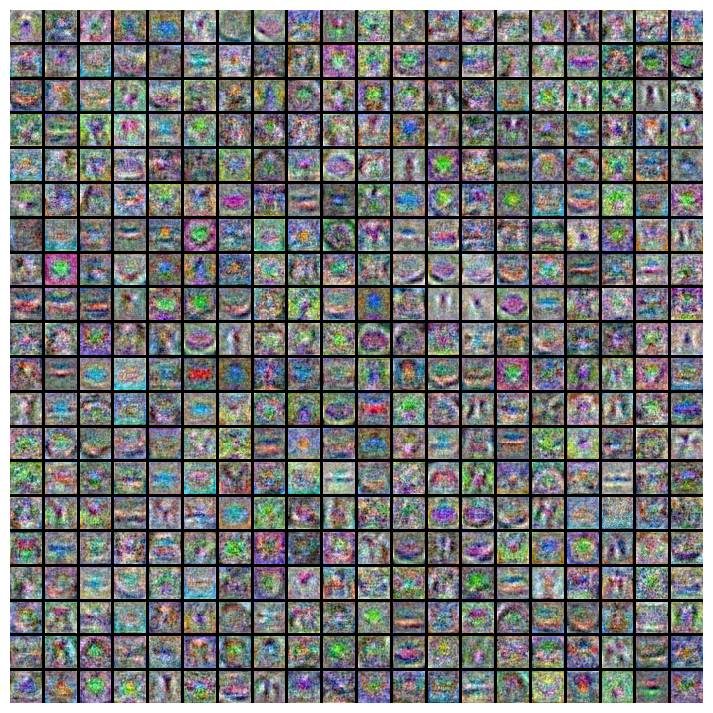

In [14]:
# visualize the weights of the best network
show_net_weights(best_net)

## 在测试集上运行
当你完成实验时，你应该在测试集上评估你最终的训练网络;你应该得到48%以上。

**我们会给你额外的分数，每1%的准确性高于52%.**

In [15]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print ('Test accuracy: ', test_acc)

Test accuracy:  0.0
